In [1]:
import pandas as pd
import src.DataProcessing.read_data as rd

ruta = '../data/New_tables/LUNES_VIERNES_C4_C6.xlsx'
hoja_c4_c6 = 'C4_C6'
base = rd.tablas_ordinarios_c4_c6_v2(ruta, hoja_c4_c6)
base = base[['ORD','COD. OP.','CIRCUITO','HORA_SALIDA','HORA_LLEGADA']]
base = base[base['CIRCUITO']=='C6'].reset_index(drop=True).drop("ORD",axis=1).reset_index()
base.columns = ["ORD","COD. OP.","CIRCUITO","SALIDA","LLEGADA"]
base['ORD'] = base['ORD']+1
base.head()

/Users/luis/Desktop/UNIVERSIDAD/PASANTIA_optimizacion/Researching_Model_Desing/src/DataProcessing/read_data.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quitumbe_sur_norte['HORA_SALIDA'] = quitumbe_sur_norte['HORA SALIDA ǪUITUMBE'].apply(hora_a_minutos)
/Users/luis/Desktop/UNIVERSIDAD/PASANTIA_optimizacion/Researching_Model_Desing/src/DataProcessing/read_data.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quitumbe_sur_norte.dropna(subset='ORD',inplace=True)
/Users/luis/Desktop/UNIVERSIDAD/PASANTIA_optimizacion/Researching_Model_Desing/src/DataProc

,ORD,COD. OP.,CIRCUITO,SALIDA,LLEGADA
0,1,16Ǫ,C6,306.0,356.0
1,2,17Ǫ,C6,314.0,364.0
2,3,18Ǫ,C6,322.0,372.0
3,4,19Ǫ,C6,330.0,380.0
4,5,20Ǫ,C6,338.0,388.0


In [2]:
#import pandas as pd
#import src.DataProcessing.read_data as rd

#ruta = 'Datasets/TABLAS ORDINARIOS CCTROLEBUS Vs11 20-10-2023-IMPR.xlsx'
#hoja_c4_c6 = 'CONSOL C4-C6-L-V'
#base = rd.lectura_tablas_c4_c6(ruta,hoja_c4_c6)
#base = rd.transformacion_a_minutos(base)
#base = base[base['CIRCUITO']=='C6'].reset_index(drop=True).drop("ORD",axis=1).reset_index()
#base.columns = ["ORD","COD. OP.","CIRCUITO","SALIDA","LLEGADA"]
#base['ORD'] = base['ORD']+1
#base.head()


In [3]:
base



,ORD,COD. OP.,CIRCUITO,SALIDA,LLEGADA
0,1,16Ǫ,C6,306.0,356.0
1,2,17Ǫ,C6,314.0,364.0
2,3,18Ǫ,C6,322.0,372.0
3,4,19Ǫ,C6,330.0,380.0
4,5,20Ǫ,C6,338.0,388.0
...,...,...,...,...,...
107,108,19Ǫ,C6,1268.0,1318.0
108,109,20Ǫ,C6,1282.0,1332.0
109,110,21Ǫ,C6,1296.0,1346.0
110,111,22Ǫ,C6,1310.0,1360.0


In [4]:
# TODO
# 1. Definir l1,u1 en base a la solución actual
# 2. l2 = l1, u2 = u1, permitir que todos los arcos que utiliza el municipio se usen para A1 y A2
# 3 Cambiar la forma de como se calculan los costos, el costos tambien aumenta una variable

# Arcos (i,j,k,l)
# i: viaje inicial
# j: viaje final
# k: deposito
# l: tipo de arco (0,1,2)

# Costos (i,j,l)
# i: viaje inicial
# j: viaje final
# l: tipo de arco (0,1,2)

delta = 15 # Parametro de tolerancia
P = 21 # Parametro que indica longitud de pause

# Parametros para controlar tiempito minimo y máximo de espera
l1 = 3
u1 = 90

# Parámetros para controlar tiempo mínimo y máximo de descanso
l2 = l1
u2 = u1

# Parametros

break1 = 240
break2 = 670#720
break3 = 960
totalHorasTrabajadas =  1440

M_P = 5
M_T = 1440

b = base['LLEGADA']
b = {key+1:value for key,value in b.to_dict().items()}

a = base['SALIDA']
a = {key+1:value for key,value in a.to_dict().items()}

base = rd.creacion_arcos_A1_A2(base,l1,u1,l2,u2)
base#['Arcos-Costo A2']

,ORD,COD. OP.,CIRCUITO,SALIDA,LLEGADA,Arcos-Costo,Arcos-Costo A1,Arcos-Costo A2
0,1,16Ǫ,C6,306.0,356.0,"[(8.0, 6.0), (9.0, 14.0), (10.0, 22.0), (11.0,...","[(8.0, 6.0), (9.0, 14.0), (10.0, 22.0), (11.0,...","[(8.0, 19.0), (9.0, 11.0), (10.0, 3.0), (11.0,..."
1,2,17Ǫ,C6,314.0,364.0,"[(9.0, 6.0), (10.0, 14.0), (11.0, 22.0), (12.0...","[(9.0, 6.0), (10.0, 14.0), (11.0, 22.0), (12.0...","[(9.0, 19.0), (10.0, 11.0), (11.0, 3.0), (12.0..."
2,3,18Ǫ,C6,322.0,372.0,"[(10.0, 6.0), (11.0, 14.0), (12.0, 22.0), (13....","[(10.0, 6.0), (11.0, 14.0), (12.0, 22.0), (13....","[(10.0, 19.0), (11.0, 11.0), (12.0, 3.0), (13...."
3,4,19Ǫ,C6,330.0,380.0,"[(11.0, 6.0), (12.0, 14.0), (13.0, 22.0), (14....","[(11.0, 6.0), (12.0, 14.0), (13.0, 22.0), (14....","[(11.0, 19.0), (12.0, 11.0), (13.0, 3.0), (14...."
4,5,20Ǫ,C6,338.0,388.0,"[(12.0, 6.0), (13.0, 14.0), (14.0, 22.0), (15....","[(12.0, 6.0), (13.0, 14.0), (14.0, 22.0), (15....","[(12.0, 19.0), (13.0, 11.0), (14.0, 3.0), (15...."
...,...,...,...,...,...,...,...,...
107,108,19Ǫ,C6,1268.0,1318.0,"[(112.0, 7.0)]","[(112.0, 7.0)]","[(112.0, 18.0)]"
108,109,20Ǫ,C6,1282.0,1332.0,[],[],[]
109,110,21Ǫ,C6,1296.0,1346.0,[],[],[]
110,111,22Ǫ,C6,1310.0,1360.0,[],[],[]


In [5]:
import numpy as np


# Unidades
M = len(base['COD. OP.'].unique()) 

print('M: ',M)
M = 8
capacidad = M

# Viajes 
N = base['ORD'].unique()
print('N: ',len(N))
N0 = np.insert(N, 0, 0)

# Creación del diccionario de costos
costos = {}
costos_A1 = {}
costos_A2 = {}
costos_inicio_fin = {}
for index,row in base.iterrows():
    costos_arcos_A1 = {(row['ORD'],int(i[0]),1):i[1] for i in row['Arcos-Costo A1']}
    costos_A1.update(costos_arcos_A1)
    costos.update(costos_arcos_A1)
    
    costos_arcos_A2 = {(row['ORD'],int(i[0]),2):i[1] for i in row['Arcos-Costo A2']}
    costos_A2.update(costos_arcos_A2)
    costos.update(costos_arcos_A2)
    
    costos_arcos = {(row['ORD'],int(i[0])):i[1] for i in row['Arcos-Costo']}
    #costos.update(costos_arcos)
    
    costos_inicio_fin[(0,row['ORD'],0)] = 0
    costos_inicio_fin[(row['ORD'],len(N)+1,0)] = 0
    costos.update(costos_inicio_fin)
    
costos.update(costos_inicio_fin)

arcos_A1 = costos_A1.keys()
arcos_A2 = costos_A2.keys()
arcos_unidades_A1 = []
arcos_unidades_A2 = []
arcos_unidades_inicio_fin = []

arcos_unidad_i_A1 = [(arco[0],arco[1],1,arco[2]) for arco in arcos_A1 if arco[0]!=0 and arco[1]!=(len(N)+1)]
arcos_unidades_A1 += arcos_unidad_i_A1

arcos_unidad_i_A2 = [(arco[0],arco[1],1,arco[2]) for arco in arcos_A2 if arco[0]!=0 and arco[1]!=(len(N)+1)]
arcos_unidades_A2 += arcos_unidad_i_A2

arcos_unidades_inicio = [(0,row['ORD'],1,0) for index,row in base.iterrows()]
arcos_unidades_fin = [(row['ORD'],len(N)+1,1,0) for index,row in base.iterrows()]
arcos_unidades_inicio_fin = arcos_unidades_inicio + arcos_unidades_fin    
    
print('A1',len(arcos_unidades_A1))
print('A2',len(arcos_unidades_A2))
print('Inicio-Fin',len(arcos_unidades_inicio_fin))
print('Inicio',len(arcos_unidades_inicio))
print('Fin',len(arcos_unidades_fin))

arcos = arcos_unidades_A1+arcos_unidades_A2+arcos_unidades_inicio_fin

indices_A1 = list(set([elemento for tupla in arcos_unidades_A1 for elemento in tupla]))

indices_A2 = list(set([elemento for tupla in arcos_unidades_A2 for elemento in tupla]))

M:  8
N:  112
A1 997
A2 997
Inicio-Fin 224
Inicio 112
Fin 112


In [6]:
costos_A2

{(1, 8, 2): np.float64(19.0),
 (1, 9, 2): np.float64(11.0),
 (1, 10, 2): np.float64(3.0),
 (1, 11, 2): np.float64(0.0),
 (1, 12, 2): np.float64(3.0),
 (1, 13, 2): np.float64(11.0),
 (1, 14, 2): np.float64(19.0),
 (1, 15, 2): np.float64(27.0),
 (1, 16, 2): np.float64(35.0),
 (1, 17, 2): np.float64(43.0),
 (1, 18, 2): np.float64(51.0),
 (2, 9, 2): np.float64(19.0),
 (2, 10, 2): np.float64(11.0),
 (2, 11, 2): np.float64(3.0),
 (2, 12, 2): np.float64(0.0),
 (2, 13, 2): np.float64(3.0),
 (2, 14, 2): np.float64(11.0),
 (2, 15, 2): np.float64(19.0),
 (2, 16, 2): np.float64(27.0),
 (2, 17, 2): np.float64(35.0),
 (2, 18, 2): np.float64(43.0),
 (2, 19, 2): np.float64(55.0),
 (3, 10, 2): np.float64(19.0),
 (3, 11, 2): np.float64(11.0),
 (3, 12, 2): np.float64(3.0),
 (3, 13, 2): np.float64(0.0),
 (3, 14, 2): np.float64(3.0),
 (3, 15, 2): np.float64(11.0),
 (3, 16, 2): np.float64(19.0),
 (3, 17, 2): np.float64(27.0),
 (3, 18, 2): np.float64(35.0),
 (3, 19, 2): np.float64(47.0),
 (4, 11, 2): np.floa

In [7]:
len(arcos)

2218

In [8]:
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

# Lists to store the evolution of key metrics
gap_list = []
time_list = []
lower_bound_list = []
upper_bound_list = []

# Define the callback function
def my_callback(model, where):
    if where == gp.GRB.Callback.MIP:
        # Check if there's a feasible solution (best objective value exists)
        best_obj = model.cbGet(gp.GRB.Callback.MIP_OBJBST)
        best_bound = model.cbGet(gp.GRB.Callback.MIP_OBJBND)

        if best_obj < gp.GRB.INFINITY:
            # Compute the GAP only if best_obj is valid
            gap = abs(best_obj - best_bound) / (abs(best_obj) + 1e-10)  # Add a small value to avoid division by zero

            # Capture the time during the optimization
            current_time = model.cbGet(gp.GRB.Callback.RUNTIME)

            # Store the values
            gap_list.append(gap)
            lower_bound_list.append(best_bound)
            upper_bound_list.append(best_obj)
            time_list.append(current_time)


# Define and optimize your Gurobi model
model = gp.Model()


m3 = gp.Model('Asignacion-Flota-V1')
# Terminar al alcanzar un Gap del 10%
m3.Params.MIPGap = 0.10
m3.setParam('OutputFlag', 1)
# Enfocar estrategia en mejorar la cota dual
m3.Params.MIPFocus = 3
m3.Params.NoRelHeurTime = 30

# Fijar generación muy agresiva de cortes
m3.Params.Cuts = 1

# Terminar luego de 180 segundos
m3.Params.TimeLimit = 7200

x = m3.addVars(arcos,vtype=GRB.BINARY,name='x')
z = m3.addVars(N,vtype=GRB.BINARY,name='z')


T = m3.addVars(N,vtype=GRB.INTEGER,name='T',ub=1440)
PV = m3.addVars(N,vtype=GRB.INTEGER,name='P',lb=0,ub=2)

#T[0].ub = 0
#PV[0].ub = 0

y0 = m3.addVars(N,vtype=GRB.BINARY,name='y1')
y1 = m3.addVars(N,vtype=GRB.BINARY,name='y2')
y2 = m3.addVars(N,vtype=GRB.BINARY,name='y3')

e0 = m3.addVars(N,vtype=GRB.CONTINUOUS,name='e0',lb=0)
e1 = m3.addVars(N,vtype=GRB.CONTINUOUS,name='e1',lb=0)
e2 = m3.addVars(N,vtype=GRB.CONTINUOUS,name='e2',lb=0)
e3 = m3.addVars(N,vtype=GRB.CONTINUOUS,name='e3',lb=0)
e4 = m3.addVars(N,vtype=GRB.CONTINUOUS,name='e4',lb=0)


m3.setParam('LogFile', 'gurobi.log')

m3.setObjective(gp.quicksum(costos[i,j,l]*x[i,j,k,l] for i,j,k,l in arcos)+ 1000*z.sum('*') + 100*(e0.sum('*') + e1.sum('*') + e2.sum('*') + e3.sum('*') + e4.sum('*')),GRB.MINIMIZE)



m3.addConstrs((x.sum(n,'*','*','*') == 1  for n in N), name=f"Constraints")
m3.addConstrs((x.sum('*',i,1,'*')-x.sum(i,'*',1,'*')==0 for i in N ),name=f'Conservacion')
m3.addConstr(x.sum(0,'*',1,0) <= capacidad, name=f"Capacidades")

m3.addConstrs((T[j] >= (b[j]-a[j]) - M_T*(1-x[i,j,k,0]) for i,j,k,l in arcos_unidades_inicio),name='T_lower_inicio')
m3.addConstrs((T[j] <=  (b[j]-a[j]) + M_T*(1-x[i,j,k,0]) for i,j,k,l in arcos_unidades_inicio),name='T_upper_inico ')

m3.addConstrs((PV[j]<= M_P*(1-x[i,j,k,0]) for i,j,k,l in arcos_unidades_inicio),name = 'P_upper_inicio')
m3.addConstrs((PV[j]>= - M_P*(1-x[i,j,k,0]) for i,j,k,l in arcos_unidades_inicio),name = 'P_lower_inicio')


m3.addConstrs((T[j] >= T[i] + (b[j]-b[i]) - M_T*(1-x[i,j,k,1]) for i,j,k,l in arcos_unidades_A1 ),name='T_upper_A1')
m3.addConstrs((T[j] <= T[i] + (b[j]-b[i]) + M_T*(1-x[i,j,k,1]) for i,j,k,l in arcos_unidades_A1 ),name='T_lower_A1')

m3.addConstrs((PV[j] >= PV[i] - M_P*(1-x[i,j,k,1]) for i,j,k,l in arcos_unidades_A1 ),name='P_upper_A1')
m3.addConstrs((PV[j] <= PV[i] + M_P*(1-x[i,j,k,1]) for i,j,k,l in arcos_unidades_A1 ),name='P_lower_A1')


m3.addConstrs((T[j] >= T[i] + (b[j]-b[i]) - M_T*(1-x[i,j,k,2]) for i,j,k,l in arcos_unidades_A2 ),name='T_upper_A2')
m3.addConstrs((T[j] <= T[i] + (b[j]-b[i]) + M_T*(1-x[i,j,k,2]) for i,j,k,l in arcos_unidades_A2 ),name='T_lower_A2')

m3.addConstrs((PV[j] >= PV[i] + 1 - M_P*(1-x[i,j,k,2]) for i,j,k,l in arcos_unidades_A2 ),name='P_upper_A2')
m3.addConstrs((PV[j] <= PV[i] + 1 + M_P*(1-x[i,j,k,2]) for i,j,k,l in arcos_unidades_A2 ),name='P_lower_A2')


m3.addConstrs((T[i]<= break1 - 0.5*P + delta+M_T*(1-y0[i]) + e0[i] for i in N), name = 'N1_Restriccion' )
m3.addConstrs((T[i] - (b[i]-a[i]) >= break1 + 0.5*P - delta-M_T*(1-y1[i]) - e1[i] for i in N), name = 'N2_Restriccion' )
m3.addConstrs((T[i]<= break2 - 0.5*P + delta+M_T*(1-y1[i]) + e2[i] for i in N), name = 'N3_Restriccion' )
m3.addConstrs((T[i] - (b[i]-a[i]) >= break2 + 0.5*P - delta-M_T*(1-y2[i]) - e3[i] for i in N), name = 'N4_Restriccion' )
m3.addConstrs((T[i]<= break3 + M_T*(1-y2[i]) +e4[i] for i in N), name = 'N4_Restriccion' )

m3.addConstrs((y0[n]+y1[n]+y2[n]==1 for n in N ),name='Aux1')
m3.addConstrs((y1[n]+2*y2[n]==PV[n] for n in N ),name='Aux2')


m3.write('Modelo.lp')


m3.optimize(my_callback)

# 16minutos ---> GAP: 72,5% | Cota Inf: 9557 | Best Value: 34711

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-16
Set parameter MIPGap to value 0.1
Set parameter MIPFocus to value 3
Set parameter NoRelHeurTime to value 30
Set parameter Cuts to value 1
Set parameter TimeLimit to value 7200
Set parameter LogFile to value "gurobi.log"
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 22.3.0 22D68)

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 9433 rows, 3450 columns and 33606 nonzeros
Model fingerprint: 0x8fdc9522
Variable types: 560 continuous, 2890 integer (2666 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 1e+03]
  RHS range        [1e+00, 2e+03]
Presolve removed 808 rows and 377 columns
Presolve time: 0.18s
Presolved: 8625 rows, 3073 columns, 57682 nonzeros
Variable types: 0 continuous, 3073 integer (2393 binary)
Starting NoRel 

In [9]:
arcos_unidades_inicio

[(0, 1, 1, 0),
 (0, 2, 1, 0),
 (0, 3, 1, 0),
 (0, 4, 1, 0),
 (0, 5, 1, 0),
 (0, 6, 1, 0),
 (0, 7, 1, 0),
 (0, 8, 1, 0),
 (0, 9, 1, 0),
 (0, 10, 1, 0),
 (0, 11, 1, 0),
 (0, 12, 1, 0),
 (0, 13, 1, 0),
 (0, 14, 1, 0),
 (0, 15, 1, 0),
 (0, 16, 1, 0),
 (0, 17, 1, 0),
 (0, 18, 1, 0),
 (0, 19, 1, 0),
 (0, 20, 1, 0),
 (0, 21, 1, 0),
 (0, 22, 1, 0),
 (0, 23, 1, 0),
 (0, 24, 1, 0),
 (0, 25, 1, 0),
 (0, 26, 1, 0),
 (0, 27, 1, 0),
 (0, 28, 1, 0),
 (0, 29, 1, 0),
 (0, 30, 1, 0),
 (0, 31, 1, 0),
 (0, 32, 1, 0),
 (0, 33, 1, 0),
 (0, 34, 1, 0),
 (0, 35, 1, 0),
 (0, 36, 1, 0),
 (0, 37, 1, 0),
 (0, 38, 1, 0),
 (0, 39, 1, 0),
 (0, 40, 1, 0),
 (0, 41, 1, 0),
 (0, 42, 1, 0),
 (0, 43, 1, 0),
 (0, 44, 1, 0),
 (0, 45, 1, 0),
 (0, 46, 1, 0),
 (0, 47, 1, 0),
 (0, 48, 1, 0),
 (0, 49, 1, 0),
 (0, 50, 1, 0),
 (0, 51, 1, 0),
 (0, 52, 1, 0),
 (0, 53, 1, 0),
 (0, 54, 1, 0),
 (0, 55, 1, 0),
 (0, 56, 1, 0),
 (0, 57, 1, 0),
 (0, 58, 1, 0),
 (0, 59, 1, 0),
 (0, 60, 1, 0),
 (0, 61, 1, 0),
 (0, 62, 1, 0),
 (0, 63, 1, 0),
 

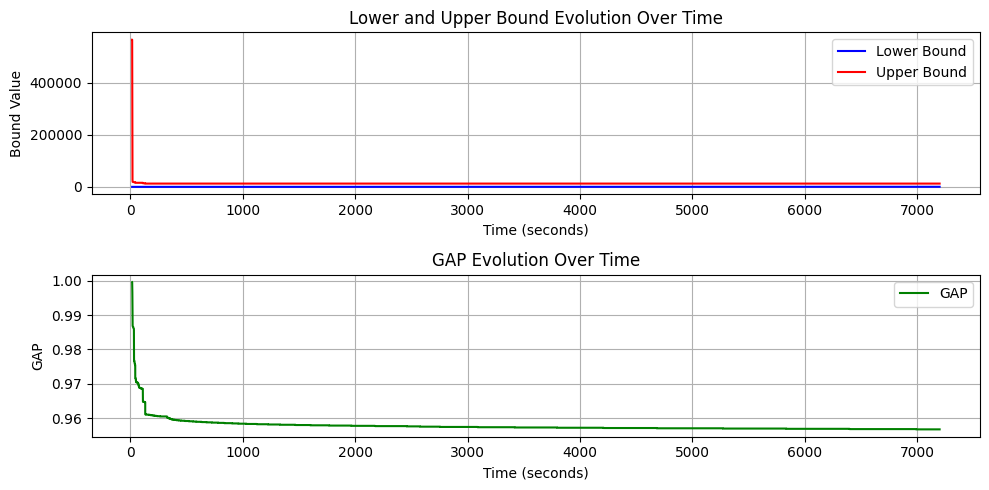

In [10]:
# Plot the results in two subplots within the same figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))  # 2 rows, 1 column

# Plot 1: Lower and Upper Bound
ax1.plot(time_list[5:], lower_bound_list[5:], label='Lower Bound', color='blue')
ax1.plot(time_list[5:], upper_bound_list[5:], label='Upper Bound', color='red')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Bound Value')
ax1.set_title('Lower and Upper Bound Evolution Over Time')
ax1.legend()
ax1.grid(True)

# Plot 2: GAP
ax2.plot(time_list[5:], gap_list[5:], label='GAP', color='green')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('GAP')
ax2.set_title('GAP Evolution Over Time')
ax2.legend()
ax2.grid(True)

# Show the plots
plt.tight_layout()  # Adjusts spacing between plots
plt.show()

In [11]:
def generar_sublistas(tuplas,tuplas_iniciales):
    sublistas = []
    while tuplas_iniciales:
        sublista = []
        actual = tuplas_iniciales.pop(0)
        sublista.append(actual)
        
        # Buscar conexiones hacia adelante
        while True:
            found = False
            for i, t in enumerate(tuplas):
                if t[0] == actual[1]:
                    sublista.append(t)
                    actual = t
                    tuplas.pop(i)
                    found = True
                    break
            if not found:
                break
        
        sublistas.append(sublista)
    
    return sublistas


def hora_a_minutos(n):
    hora = str(n).split(':')
    if len(hora) == 3:
        return float(hora[0])*60 + float(hora[1])+ float(hora[2])/100
    if len(hora) == 2:
        return float(hora[0])*60 + float(hora[1])



vx = m3.getAttr('x', x)
solucion = {}
tuplas = []
tuplas_iniciales = []
contador = 1
for tupla,valor in vx.items():
    if valor >= 0.95 :
        tuplas.append(tupla)
    if valor >= 0.95 and tupla[0]==0:
        tuplas_iniciales.append(tupla)
        
todas_las_tuplas = []
todas_las_tuplas.extend(tuplas)
resultados = generar_sublistas(tuplas,tuplas_iniciales)


for i in resultados:
    if len(i)>1:
        solucion[contador] = {0:0}
        
        solucion[contador][0]= i[0][0]
        for k in i:
            solucion[contador][k[0]]= k[1]
        contador +=1
        
print("---------------------- SOLUCION ----------------------")
print(solucion)

arcos_tuplas = []
for arco in todas_las_tuplas:
    arcos_tuplas.append((arco[1],'A'+str(arco[3]))) 
tipoArcoDataframe = pd.DataFrame(arcos_tuplas,columns=['ORD','TIPO'])
print(tipoArcoDataframe)
asignacion = pd.DataFrame()
for k in range(1,M+1):   
    nodo = 0    
    ord = []
    tiempo_anden = []
    while nodo != len(N)+1:
        if nodo == 0 or solucion[k][nodo] == 113:
            tiempo_anden.append(costos[nodo,solucion[k][nodo],0])
        else:
            tiempo_anden.append(costos[nodo,solucion[k][nodo],1])
        ord.append(solucion[k][nodo])
        nodo = solucion[k][nodo]
    
    a = base[list(base.columns[0:1]) + list(base.columns[3:5]) + list(base.columns[9:10])]
    a = a[a['ORD'].isin(ord)].reset_index(drop=True)
    a['Tiempo en anden'] = pd.Series(tiempo_anden)
    a['UNIDAD ASIGNADA'] = k
    
    asignacion = pd.concat([asignacion,a])
asignacion = asignacion.sort_values(by='SALIDA')
asignacion = pd.merge(asignacion,tipoArcoDataframe,on='ORD')
print('---------------------- ASIGNACION FINAL ----------------------')
print(asignacion.head(10).to_markdown(index=False),'\n')


---------------------- SOLUCION ----------------------
{1: {0: 1, 1: 8, 8: 19, 19: 29, 29: 36, 36: 43, 43: 50, 50: 57, 57: 64, 64: 71, 71: 79, 79: 86, 86: 93, 93: 113}, 2: {0: 2, 2: 9, 9: 16, 16: 28, 28: 35, 35: 113}, 3: {0: 3, 3: 10, 10: 17, 17: 22, 22: 30, 30: 38, 38: 45, 45: 52, 52: 59, 59: 66, 66: 73, 73: 80, 80: 85, 85: 92, 92: 99, 99: 105, 105: 113}, 4: {0: 4, 4: 11, 11: 18, 18: 23, 23: 31, 31: 39, 39: 46, 46: 53, 53: 60, 60: 67, 67: 74, 74: 82, 82: 88, 88: 95, 95: 101, 101: 113}, 5: {0: 5, 5: 12, 12: 20, 20: 25, 25: 34, 34: 42, 42: 49, 49: 56, 56: 63, 63: 70, 70: 77, 77: 84, 84: 91, 91: 98, 98: 104, 104: 109, 109: 113}, 6: {0: 6, 6: 13, 13: 24, 24: 33, 33: 40, 40: 47, 47: 54, 54: 61, 61: 68, 68: 75, 75: 83, 83: 89, 89: 96, 96: 102, 102: 107, 107: 111, 111: 113}, 7: {0: 7, 7: 14, 14: 21, 21: 27, 27: 37, 37: 44, 44: 51, 51: 58, 58: 65, 65: 72, 72: 78, 78: 87, 87: 94, 94: 100, 100: 106, 106: 110, 110: 113}, 8: {0: 15, 15: 26, 26: 32, 32: 41, 41: 48, 48: 55, 55: 62, 62: 69, 69: 76, 

In [12]:
asignacion[asignacion['TIPO']=='A2']

,ORD,SALIDA,LLEGADA,Tiempo en anden,UNIDAD ASIGNADA,TIPO
27,28,554.0,606.0,76.0,2,A2
28,29,564.0,616.0,58.0,1,A2
29,30,574.0,626.0,32.0,3,A2
30,31,582.0,634.0,28.0,4,A2
32,33,598.0,650.0,32.0,6,A2
33,34,606.0,658.0,30.0,5,A2
36,37,630.0,682.0,34.0,7,A2
40,41,662.0,714.0,20.0,8,A2
78,79,978.0,1030.0,24.0,1,A2
79,80,990.0,1042.0,20.0,3,A2


In [13]:
asignacion[asignacion['UNIDAD ASIGNADA']==2]

,ORD,SALIDA,LLEGADA,Tiempo en anden,UNIDAD ASIGNADA,TIPO
1,2,314.0,364.0,0.0,2,A0
8,9,370.0,422.0,6.0,2,A1
15,16,426.0,478.0,4.0,2,A1
27,28,554.0,606.0,76.0,2,A2
34,35,614.0,666.0,8.0,2,A1


In [14]:
unidad = 1

print(f'---------------------- ASIGNACION UNIDAD {unidad} ----------------------')

resultado_individual = asignacion[asignacion['UNIDAD ASIGNADA']==unidad]
print(resultado_individual.to_markdown(index=False),'\n')

vT = m3.getAttr('x', T)
vPV = m3.getAttr('x',PV)
vY0 = m3.getAttr('x',y0)
vY1 = m3.getAttr('x',y1)
vY2 = m3.getAttr('x',y2)

solucion = {}
tuplas = []
contador = 1

print(f'---------------------- VARIABLES MODELO ----------------------')

for i in resultado_individual['ORD'].to_list():
    print(f"Nodo {i}, T: {vT[i]}, P: {vPV[i]}, y0: {vY0[i]}, y1: {vY1[i]}, y2: {vY2[i]}")

---------------------- ASIGNACION UNIDAD 1 ----------------------
|   ORD |   SALIDA |   LLEGADA |   Tiempo en anden |   UNIDAD ASIGNADA | TIPO   |
|------:|---------:|----------:|------------------:|------------------:|:-------|
|     1 |      306 |       356 |                 0 |                 1 | A0     |
|     8 |      362 |       414 |                 6 |                 1 | A1     |
|    19 |      454 |       506 |                40 |                 1 | A1     |
|    29 |      564 |       616 |                58 |                 1 | A2     |
|    36 |      622 |       674 |                 6 |                 1 | A1     |
|    43 |      678 |       730 |                 4 |                 1 | A1     |
|    50 |      734 |       786 |                 4 |                 1 | A1     |
|    57 |      790 |       842 |                 4 |                 1 | A1     |
|    64 |      846 |       898 |                 4 |                 1 | A1     |
|    71 |      902 |       954 |

In [15]:
asignacion

,ORD,SALIDA,LLEGADA,Tiempo en anden,UNIDAD ASIGNADA,TIPO
0,1,306.0,356.0,0.0,1,A0
1,2,314.0,364.0,0.0,2,A0
2,3,322.0,372.0,0.0,3,A0
3,4,330.0,380.0,0.0,4,A0
4,5,338.0,388.0,0.0,5,A0
...,...,...,...,...,...,...
107,108,1268.0,1318.0,10.0,8,A1
108,109,1282.0,1332.0,14.0,5,A1
109,110,1296.0,1346.0,4.0,7,A1
110,111,1310.0,1360.0,6.0,6,A1


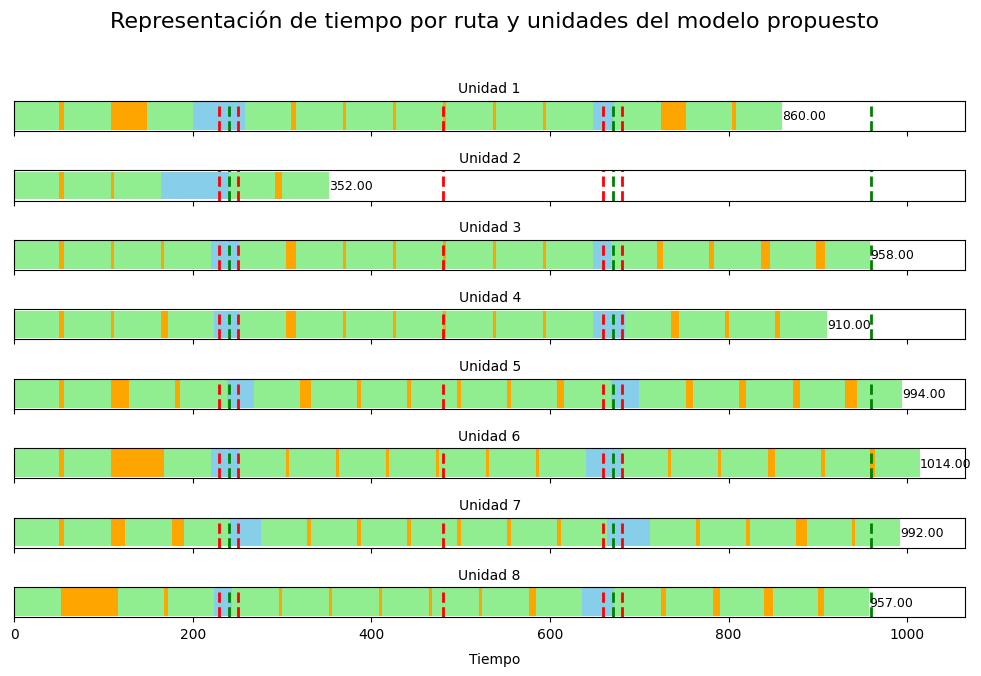

In [20]:
import matplotlib.pyplot as plt

asignacion['TIEMPO_VIAJE'] = asignacion['LLEGADA'] - asignacion['SALIDA']

# Valor umbral para cambiar de color
valor_umbral = u1

# Obtener las unidades únicas
unidades = asignacion['UNIDAD ASIGNADA'].unique()

# Crear un subgráfico por cada unidad
fig, axs = plt.subplots(len(unidades), 1, figsize=(10, len(unidades)*1/1.15), sharex=True)  # Ajustar el tamaño del gráfico

# Valores para las líneas verticales

lineas_verticales_exacto = [break1,break2,break3]
lineas_verticales = [break1-P/2, break1+P/2, 480, break2-P/2, break2+P/2]

for i, unidad in enumerate(unidades):
    asignacion_unidad = asignacion[asignacion['UNIDAD ASIGNADA'] == unidad]
    
    Type = []
    Time = []
    Colors = []
    for j, row in asignacion_unidad.iterrows():
        if not np.isnan(row['Tiempo en anden']):
            Type.append('A1')
            Time.append(row['Tiempo en anden'])
            # Asignar color según el valor del tiempo en andén
            if row['TIPO'] == 'A1':
                Colors.append('orange')
            else:
                Colors.append('skyblue')
        Type.append('A2')
        Time.append(row['TIEMPO_VIAJE'])
        Colors.append('lightgreen')  # Color fijo para A2
    
    data = pd.DataFrame({
        "Type": Type,
        "Time": Time,
        "Colors": Colors
    })
    
    left = 0
    bar_height = 0.3  # Ajustar el ancho de las barras
    for idx, row in data.iterrows():
        axs[i].barh(y=0, width=row['Time'], left=left, color=row['Colors'], height=bar_height)
        left += row['Time']
    
    # Añadir el texto al final de la barra
    total_time = left  # La longitud total de la barra es 'left' después del bucle
    axs[i].text(left + 0.5, 0, f'{total_time:.2f}', va='center', fontsize=9)  # Ajusta 0.5 para dar espacio al texto
    
    axs[i].set_yticks([])
    axs[i].set_title(f'Unidad {unidad}', fontsize=10)

    # Añadir líneas verticales rojas en los valores especificados
    for x_value in lineas_verticales:
        axs[i].axvline(x=x_value, color='red', linestyle='--', linewidth=2)
    for x_value in lineas_verticales_exacto:
        axs[i].axvline(x=x_value, color='green', linestyle='--', linewidth=2)

# Etiquetas comunes
fig.text(0.5, 0.04, 'Tiempo', ha='center')
fig.suptitle('Representación de tiempo por ruta y unidades del modelo propuesto', fontsize=16)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show() 

In [23]:
costos

{(1, 8, 1): np.float64(6.0),
 (1, 9, 1): np.float64(14.0),
 (1, 10, 1): np.float64(22.0),
 (1, 11, 1): np.float64(30.0),
 (1, 12, 1): np.float64(38.0),
 (1, 13, 1): np.float64(46.0),
 (1, 14, 1): np.float64(54.0),
 (1, 15, 1): np.float64(62.0),
 (1, 16, 1): np.float64(70.0),
 (1, 17, 1): np.float64(78.0),
 (1, 18, 1): np.float64(86.0),
 (1, 8, 2): np.float64(19.0),
 (1, 9, 2): np.float64(11.0),
 (1, 10, 2): np.float64(3.0),
 (1, 11, 2): np.float64(0.0),
 (1, 12, 2): np.float64(3.0),
 (1, 13, 2): np.float64(11.0),
 (1, 14, 2): np.float64(19.0),
 (1, 15, 2): np.float64(27.0),
 (1, 16, 2): np.float64(35.0),
 (1, 17, 2): np.float64(43.0),
 (1, 18, 2): np.float64(51.0),
 (0, 1, 0): 0,
 (1, 113, 0): 0,
 (2, 9, 1): np.float64(6.0),
 (2, 10, 1): np.float64(14.0),
 (2, 11, 1): np.float64(22.0),
 (2, 12, 1): np.float64(30.0),
 (2, 13, 1): np.float64(38.0),
 (2, 14, 1): np.float64(46.0),
 (2, 15, 1): np.float64(54.0),
 (2, 16, 1): np.float64(62.0),
 (2, 17, 1): np.float64(70.0),
 (2, 18, 1): np.f

In [34]:
vz = m3.getAttr('x', x)
costo = 0
for tupla,valor in vz.items():
    if valor >= 0.95 :
        if tupla[0] != 0 and tupla[1]!=113:
            costo += costos[tupla[0],tupla[1],1]
costo

np.float64(1247.0)